<a href="https://colab.research.google.com/github/Arpitsinghvampire/computer_vision/blob/main/colouring_with_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#lets start by importing the necessary dependencies
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
import cv2

Now here we import the model

In [2]:
(x_train,_),(x_test,_)=cifar10.load_data()



170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
#now we will break each image into the corresponding three color channels
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0 #for normalization

print(x_train[0].shape)

(32, 32, 3)


In [5]:

#the grey channels would be given as an input to all the three branches
gray_x_train=[]
for i in range(len(x_train)):
  gray_x_train.append(np.dot(x_train[i],[0.299,0.587,0.114]))


print(gray_x_train[0].shape)

(32, 32)


In [6]:
#similarly we do for the x_test dataset
gray_x_test=[]
for i in range(len(x_test)):
  gray_x_test.append(np.dot(x_test[i],[0.299,0.587,0.114]))


print(gray_x_test[0].shape)

(32, 32)


In [7]:
print(x_train[0][:,:,0].shape)

(32, 32)


In [8]:
gray_x_train=np.array(gray_x_train)
gray_x_test=np.array(gray_x_test)
x_train=np.array(x_train)
x_test=np.array(x_test)

Now after creating the train and test set we now create our model , the model will take into input the grey channels and then output the colored image

In [9]:
#now here we create the model
input=Input(shape=(32,32,1))
red_conv=Conv2D(32,(3,3),padding='same',activation='relu')(input)
batchnom=BatchNormalization()(red_conv)
red_conv1=Conv2D(64,(3,3),padding='same',activation='relu')(batchnom)
batchnorm1=BatchNormalization()(red_conv1)
red_conv2=Conv2D(16,(3,3),padding='same',activation='relu')(batchnorm1)
batchnorm2=BatchNormalization()(red_conv2)
red_conv3=Conv2D(8,(3,3),padding='same',activation='relu')(batchnorm2)
red_conv4=Conv2D(1,(3,3),padding='same',activation='relu')(red_conv3)


blue_conv=Conv2D(32,(3,3),padding='same',activation='relu')(input)
batchnom=BatchNormalization()(blue_conv)
blue_conv1=Conv2D(64,(3,3),padding='same',activation='relu')(batchnom)
batchnorm1=BatchNormalization()(blue_conv1)
blue_conv2=Conv2D(16,(3,3),padding='same',activation='relu')(batchnorm1)
batchnorm2=BatchNormalization()(blue_conv2)
blue_conv3=Conv2D(8,(3,3),padding='same',activation='relu')(batchnorm2)
blue_conv4=Conv2D(1,(3,3),padding='same',activation='relu')(blue_conv3)



green_conv=Conv2D(32,(3,3),padding='same',activation='relu')(input)
batchnom=BatchNormalization()(red_conv)
green_conv1=Conv2D(64,(3,3),padding='same',activation='relu')(batchnom)
batchnorm1=BatchNormalization()(green_conv1)
green_conv2=Conv2D(16,(3,3),padding='same',activation='relu')(batchnorm1)
batchnorm2=BatchNormalization()(green_conv2)
green_conv3=Conv2D(8,(3,3),padding='same',activation='relu')(batchnorm2)
green_conv4=Conv2D(1,(3,3),padding='same',activation='relu')(green_conv3)


#now after getting the three layers we would need to concatenate them
concat=Concatenate()([red_conv4,green_conv4,blue_conv4])

coloring_model=Model(inputs=input,outputs=concat)

coloring_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 32)           320       ['input_1[0][0]']             
                                                                                                  
 conv2d_5 (Conv2D)           (None, 32, 32, 32)           320       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                               

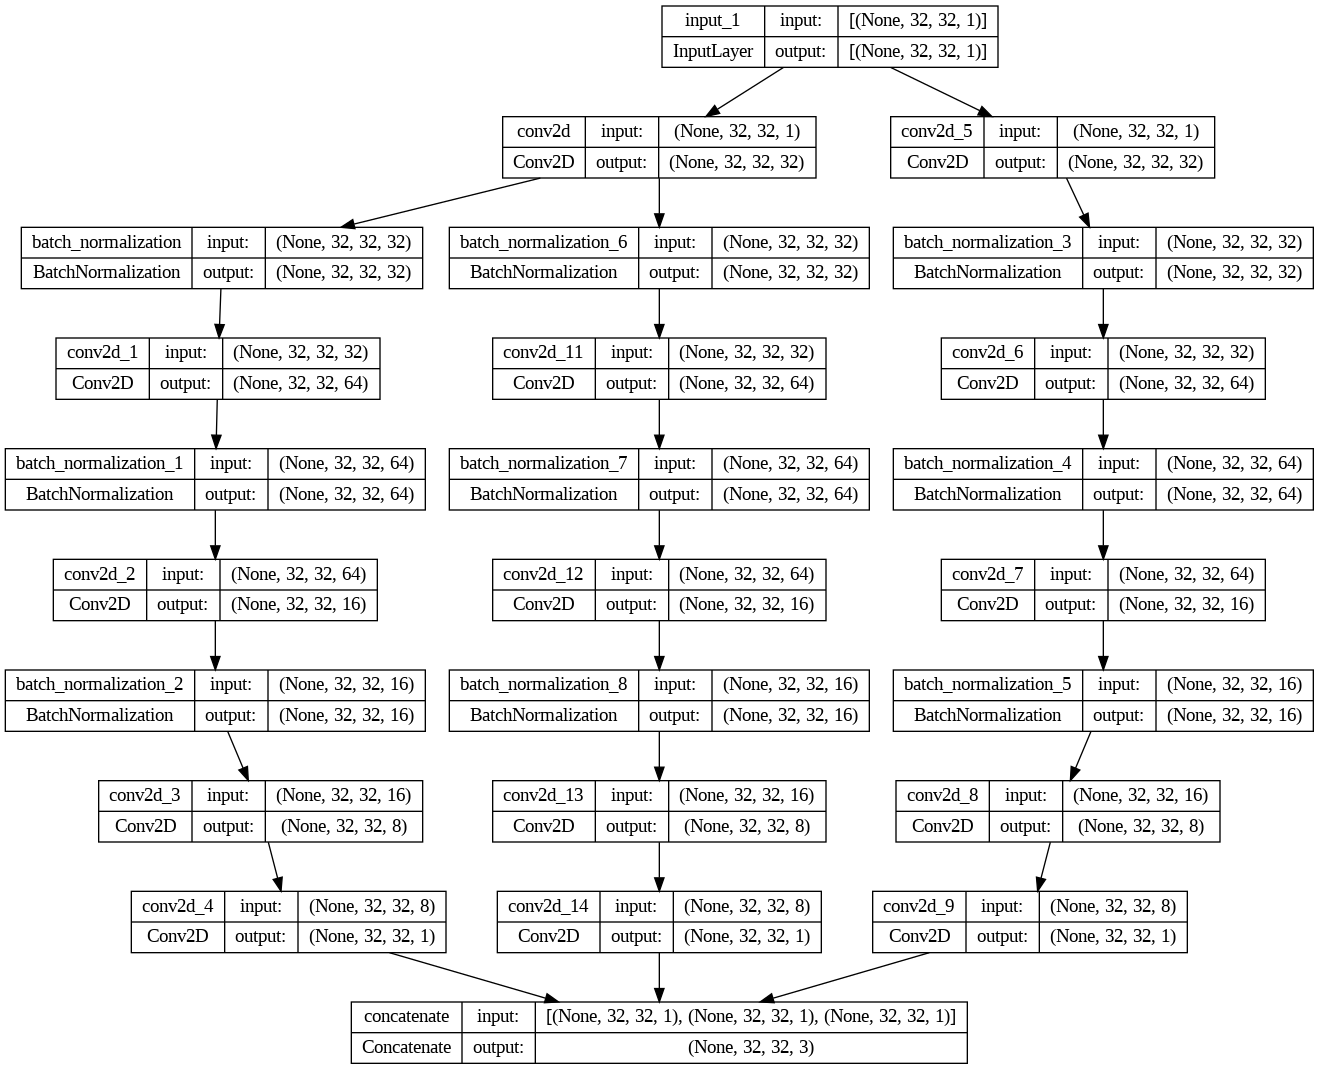

In [10]:
#now lets plot the model to get the representation of the model
plot_model(coloring_model,show_layer_names=True,show_shapes=True)


In [11]:
#now  lets compile the model first
coloring_model.compile(optimizer='Adam',loss='mse',metrics=['accuracy'],run_eagerly=True)


In [12]:
#now after compiling the model , lets fit the dat into the model
coloring_model.fit(gray_x_train,x_train,epochs=10,batch_size=64,validation_data=(gray_x_test,x_test))

Epoch 1/10


782/782 [==============================] - 95s 109ms/step - loss: 0.0147 - accuracy: 0.3942 - val_loss: 0.0079 - val_accuracy: 0.3918
Epoch 2/10
782/782 [==============================] - 83s 106ms/step - loss: 0.0073 - accuracy: 0.4225 - val_loss: 0.0066 - val_accuracy: 0.4597
Epoch 3/10
782/782 [==============================] - 81s 104ms/step - loss: 0.0068 - accuracy: 0.4392 - val_loss: 0.0081 - val_accuracy: 0.4053
Epoch 4/10
782/782 [==============================] - 84s 107ms/step - loss: 0.0066 - accuracy: 0.4468 - val_loss: 0.0061 - val_accuracy: 0.4358
Epoch 5/10
782/782 [==============================] - 84s 107ms/step - loss: 0.0064 - accuracy: 0.4530 - val_loss: 0.0095 - val_accuracy: 0.3508
Epoch 6/10
782/782 [==============================] - 85s 108ms/step - loss: 0.0064 - accuracy: 0.4535 - val_loss: 0.0059 - val_accuracy: 0.4689
Epoch 7/10
782/782 [==============================] - 85s 108ms/step - loss: 0.0063 - accuracy: 0.4581 - val_loss: 0.0063 - val_accuracy: 0.4

1/1 [==============================] - 0s 43ms/step


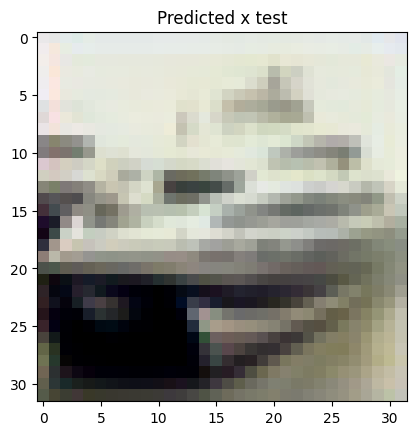

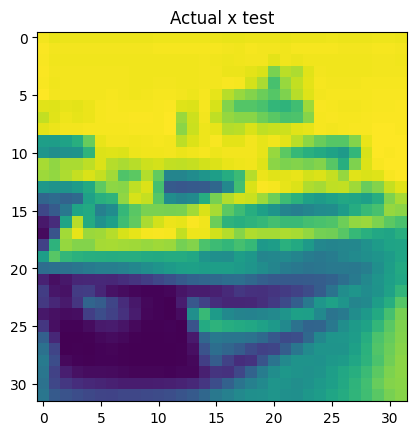

In [16]:
# Select an image and ensure it has the correct shape
input_image = gray_x_test[1]
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension, making it (1, 32, 32, 1)

# Predict
z = coloring_model.predict(input_image)

# Remove batch dimension for visualization
z = np.squeeze(z, axis=0)

plt.imshow(z)
plt.title("Predicted x test")
plt.show()

# Visualize actual grayscale input
y = gray_x_test[1]

plt.imshow(y)
plt.title("Actual x test")
plt.show()